In [1]:
from glob import glob
from PIL import Image
from tqdm import tqdm
import os
import cv2
import json
import shutil
import numpy as np
import requests
import uuid
import time
import sys

In [2]:
def init_naver_ocr():
    images_lst = []
    images_lst.append({'format':'png', 'name':'test'})
    secret = 'akpWb0JhSW1iY2d4QnNQZ0tWeFJoak9VZnpLd1F6TFY='
    access = 'egFSzgog2VBvqebXwm8w'
    message = json.dumps({'version': 'V2', 'images':images_lst, 'requestId':str(uuid.uuid4()), 'timestamp':int(time.time()*1000)}).encode('UTF-8')
    payload = {'message': message}
    headers = {
      'X-OCR-SECRET': secret
    }
    return headers, payload

def naver_ocr(image, headers, payload):
    files = [('file', open(image, 'rb'))] # image open
    api_url = 'https://bd7c7d0a0e824a08a74d1ca04dc86c73.apigw.ntruss.com/custom/v1/13126/4cb51ffcd7c65130a5f792520108aea02a72c198bc5a1326a109aa22fdc04be8/general'
    response = requests.request("POST", api_url, headers=headers, data = payload, files = files)
    result = json.loads(response.text)
    
    return result
    
headers, payload = init_naver_ocr()

In [3]:
root_path = "/home/ubuntu/workspace/seunghoon/z_dataset"
target_folder_name = "diablo2_dataset_ver2"

src_folder_name = "labelme_dataset_org"
dst_folder_name = "labelme_dataset_processing1"

In [4]:
src_imgs = glob(os.path.join(root_path, target_folder_name, src_folder_name, "*"))
# src_imgs = [i for i in src_imgs if ".png" in i or ".jpg" in i]
print(len(src_imgs))

24122


In [5]:
os.makedirs(os.path.join(root_path, target_folder_name, dst_folder_name), exist_ok=True)

for img in tqdm(src_imgs):
    ext_name = os.path.splitext(os.path.basename(img))[1]
    dst_path = img.replace(src_folder_name, dst_folder_name)
    json_path = dst_path.replace(ext_name, ".json")
    if os.path.isfile(json_path):
        continue
    
    output = naver_ocr(img, headers, payload)
    
    shutil.copy(img, dst_path)
    with open(json_path, "w") as f:
        json.dump(output, f, ensure_ascii=False)
    # break

100%|██████████| 24122/24122 [00:00<00:00, 126799.54it/s]


23430


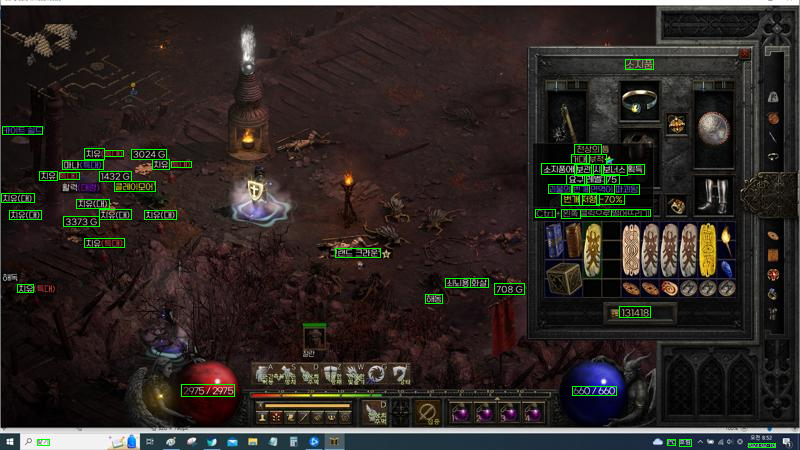

['소지품', '카이트 쉴드', '천상의', '치유', 'SO', '3024G', '거대', '부적', '마트(동대)', '치유', 'ALEHO', '소지품에', '보관', '시', '보너스', '획득', '치유', 'SEET', '1432G', '요구', '레벨:', '75', '클레이모어', '괴물의', '번개', '면역이', '파괴왕', '치유(대)', '치유(대)', '번개', '저항', '-70%', '치유(CE)', '치유(대)', '치유(DD', 'Ctrl', '왼쪽', '###中###', 'SONEON', '3373 G', '치유(특대)', '랜드 크라운', '쇠뇌용', '화살', '치유', '708G', '해동', '131418', '2975/2975', '660/660', '찾기', 'T°C', '모유', '0210010']
-----------------------------------


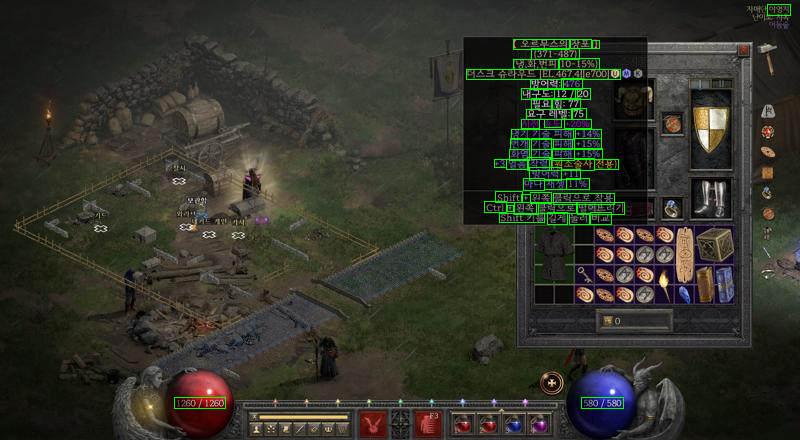

['이영지', '[오르무스의', '장포', ')', '(371-487)', '(냉,화,번피', '10-15%)', '더스크 슈라우드 [EL467.4][e700]0', '방어력:', '476', '내구도:', '12/', '20', '필요', '힝:77', '요구레벨:', '75', '시전', '속도', '+20%', '냉기 기술 피해', '+14%', '번개', '기술', '피해', '+15%', '화영', '기술', '피해', '+15%', '+3', '얼음', '작렬', '(원소술사', '전용)', '방어력', '+11', '마나', '재생', '11%', 'Shift', '+', '왼쪽', '클릭으로 착용', 'Ctrl', '+', '왼쪽', '클릭으로', '떨어뜨리기', 'Shift 키류', '길게', '눌러', '비교', '1260/1260', '580/580']
-----------------------------------


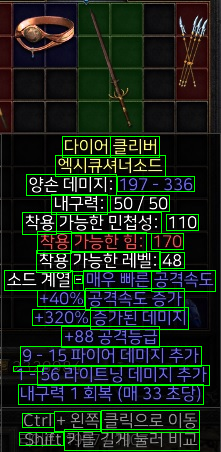

['다이어', '클리버', '엑시큐셔너소드', '양손데미지:', '197-336', '내구력:', '50/50', '착용', '가능한 민첩성:', '110', '착용', '가능한 힘:', '170', '착용', '가능한 레벨:', '48', '소드 계열', '-', '매우 빠른', '공격속도', '+40%', '공격속도 증가', '+320%', '증가된 데미지', '+88공격등급', '9-15파이어 더미지 추가', '13.2', '56 라이트닝 데미지 추가', '내구력 1회복(매 33 초당)', 'Ctrl', '+ 왼쪽', '클릭으로 이동', 'Shift', '키를 길게 눌러 비교']
-----------------------------------


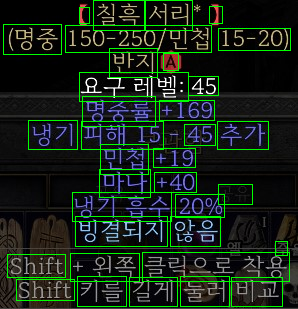

['【', '칠흑', '서리', '】', '(명중', '150-250/민첩', '15-20)', '반지', 'A', '요구 레벨:', '45', '명중률', '+169', '냉기', '피해 15', '45', '추가', '민첩', '+19', '마나', '+40', '공유', '냉기흡흡', '20%', '빙결되지', '않음', '즉', 'Shift', '+ 왼쪽', '클릭으로 착용', 'Shift', '키를', '길게', '눌러', '비교']
-----------------------------------


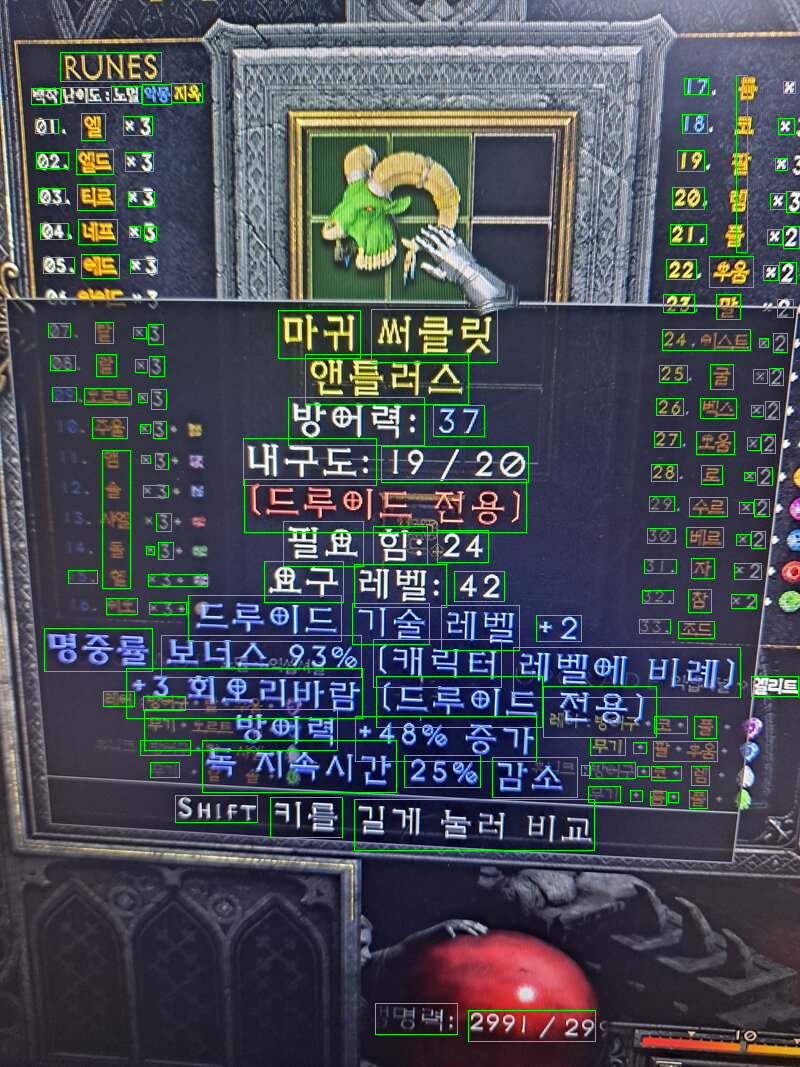

['RUNES', '룸코팔렘플', '17', 'x', '백작', '난이도:', '노멀', '악몽', '지옥', '01', '엘', '×3', '18', 'x', '02.', '엘드', '×3', '19', 'x', '03', '티르', '×3', '20', 'x', '3', '04', '네프', '*', '3', '21.', 'x', '2', '05.', '에드', '×3', '22', '"title', 'x', '2', '23', '말', '2', '07', '탈', 'x', '3', '마귀', '써클릿', '24.이스트', 'X', '2', '08', '랄', 'x', '3', '앤틀러스', '25', '굴', 'x', '2', '09', '오르트', 'X', '3', '26', '벡스', '2', '방어력:', 'x', '주울', 'X', '3', '37', '27', '"고움', 'x', '2', '내구도:', '19 / 20', '앰슐할일헬', 'X', '3', '28', '로', 'X', '2', '×3', '[드루이드 전용]', '29', '수르', 'x', '2', '3', '필요', '베르', '힘:', '30', '2', '24', 'x', 'X', '3', '31.', '자', '×2', '15.', '*3·4', '요구', '레벨:', '42', '32.', '참', '×2', '위로', '×3+', '드루이드', '기술', '레벨', '+2', '33.', '조드', '명중률', '보너스 93%', '(캐릭터', '레벨에 비례)', '엘리트', '레어', '+3 회오리바람', '벙커구', '(드루이드', '전용).', '무기+노르트방어력', '코 *', '플', ':방어구', '+48% 증가', '무기', '.', '팔+후움', '무기', '독 지속시간', '25%', '감소크', ':', '방어구', '+', '코+', '렘', '무기', '·', '룸', '.', '플', 'SHIFT', '키를', '길게 눌러 비교', '생명력:',

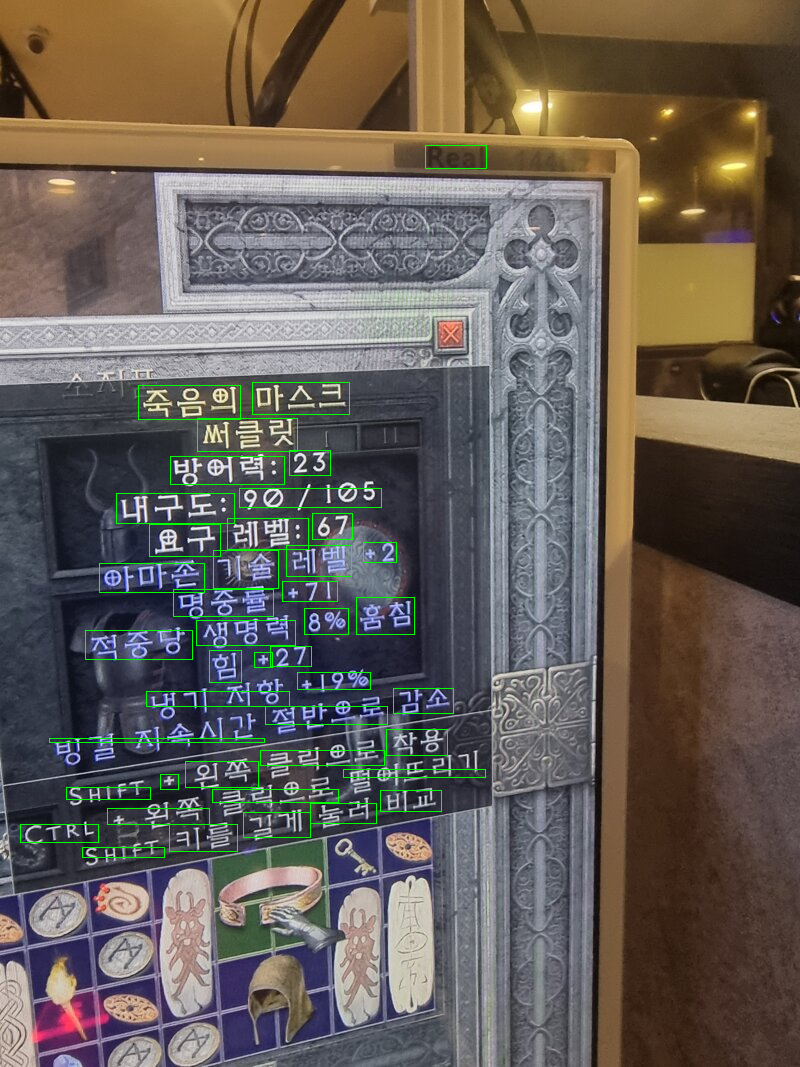

['Real', '죽음의', '마스크', '써클릿', '방어력:', '23', '내구도:', '90/105', '요구', '레벨:', '67', '아마존', '기술', '레벨', '+2', '명중률', '+ 7 1', '적중당', '생명력', '8%', '훔침', '힘', '+', '27', '냉기 저항', '+19%', '빙결 지속시간', '절반으로', '감소', '+', '왼쪽', "클릭'으로", '떨어뜨리기', '착용', 'SHIFT', 'CTRL', 'SHIFT', '+왼쪽', '키를', '클릭으로', '길게', '·눌러', '비교']
-----------------------------------


In [7]:
check_img_lst = glob(os.path.join(root_path, target_folder_name, dst_folder_name, "*"))
check_img_lst = [i for i in check_img_lst if not ".json" in i]
print(len(check_img_lst))
for end_num, check_img in enumerate(check_img_lst):
    check_json_path = check_img.replace(os.path.splitext(check_img)[-1], ".json")
    with open (check_json_path, "r")as f:
        data = json.load(f)
        
    cv_img = cv2.imread(check_img, cv2.IMREAD_UNCHANGED)
    final_text_lst = []
        
    if "images" in data:
        for idx, i in enumerate(data["images"][0]["fields"]):
            infer_text = i['inferText']
            tmp_lst = []
            for coor_dict in i['boundingPoly']['vertices']:
                x = int(coor_dict['x'])
                y = int(coor_dict['y'])
                tmp_lst.append((x, y))
                
            cv_img = cv2.rectangle(cv_img, tmp_lst[0], tmp_lst[2], (0, 255, 0), 1)
            final_text_lst.append(infer_text)
            # print(tmp_lst)
            # print(infer_text)
        
    cv_img = cv2.cvtColor(cv_img, cv2.COLOR_BGR2RGB)
    display(Image.fromarray(cv_img))
    print(final_text_lst)
    print("-----------------------------------")
    if end_num == 5:
        break